## Modelos númericos

In [33]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Cargamos el dataset de Kaggle

In [34]:
data = pd.read_csv('Train.csv')

Eliminamos la columna del identificador de cada registro porque no nos aporta nada

In [35]:
data = data.drop('ID', axis=1)

Empezamos a convertir variables categóricas en numéricas. Para el caso del género, solo hay dos valores posibles, así que utilizamos la función replace

In [36]:
data['Gender'] = data['Gender'].replace({'F': 0, 'M': 1})

C:\Users\Juanlu\AppData\Local\Temp\ipykernel_5064\504808556.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'F': 0, 'M': 1})


Para los campos que contienen más de dos categorías, recurrimos a una técnica muy útil llamada one-hot encoding, que consiste en desdoblar una columna en tantas como categorías tenga, y cada instancia tendrá valor 1 para la categoría del valor original y valor 0 en las demás.

In [37]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

for column in ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']:
    data = onehot_encode(data, column=column)

Separamos el dataset en los datos de entrada 'X' y los de salida 'y'

In [38]:
y = data['Reached.on.Time_Y.N']
X = data.drop('Reached.on.Time_Y.N', axis=1)

Y también hacemos la separación entre los datos que usaremos para el entrenamiento 'train' y los que reservamos para evaluar después el modelo 'test'

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

Para varias de las técnicas que se van a aplicar, es necesario que los datos estén normalizados. En general, esto se hace operando con la media y la varianza, pero si no conoces la técnica matemática, no te preocupes, el módulo StandardScaler lo hace por ti. Puedes consultar la [documentación](https://scikit-learn.org/stable/modules/preprocessing.html) para saber más.

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),
                      index=X_train.index,
                      columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),
                     index=X_test.index,
                     columns=X_test.columns)

Generación del modelo y entrenamiento

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [42]:
model = Sequential()
model.add(Dense(128, activation='tanh', input_shape=(18,)))
model.add(Dense(320,activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(128,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Juanlu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6275 - loss: 0.6275
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6389 - loss: 0.5693
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6459 - loss: 0.5420
Epoch 4/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6627 - loss: 0.5280
Epoch 5/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6642 - loss: 0.5186
Epoch 6/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6596 - loss: 0.5225
Epoch 7/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6557 - loss: 0.5262
Epoch 8/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6771 - loss: 0.5142
Epoch 9/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6700 - loss: 0.5152
Epoch 10/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6646 - loss: 0.5043


In [45]:
model.evaluate(X_test, y_test)

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6822 - loss: 0.5014


[0.5127564668655396, 0.675151526927948]

## Modelos de imágenes

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [47]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Utilizamos len, shape, e imshow para explorar y ver con qué estamos trabajando Pistas: adimensionalizar las imágenes (intensidad de tono de pixel) y crear una lista con los nombres de las clases.

In [48]:
train_images.shape

(60000, 28, 28)

In [49]:
len(train_labels)

60000

In [50]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [51]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

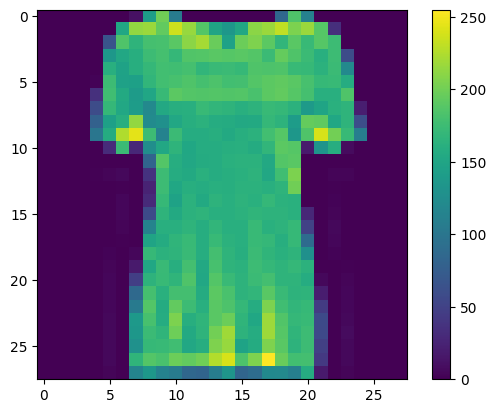

In [52]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()

In [53]:
train_images = train_images/255.0
test_images = test_images/255.0

<function matplotlib.pyplot.show(close=None, block=None)>

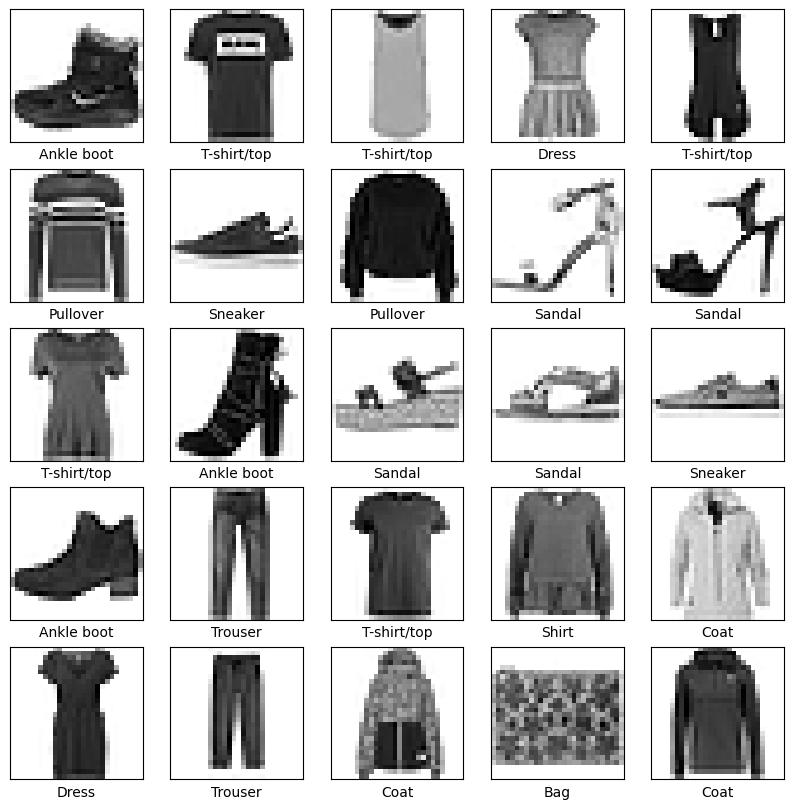

In [54]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# El método show no es necesario en colab
plt.show

### Construcción del modelo

In [55]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

c:\Users\Juanlu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Parámetros del entrenamiento

In [56]:
model.compile(optimizer= 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Entrenamos el modelo

In [57]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7756 - loss: 0.6323
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8569 - loss: 0.3929
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8727 - loss: 0.3488
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8851 - loss: 0.3119
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8912 - loss: 0.2968
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8949 - loss: 0.2844
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9021 - loss: 0.2645
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9043 - loss: 0.2577
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9086 - loss: 0.2442
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9142 - loss: 0.2339


Evaluamos el modelo

In [58]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy: ', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8795 - loss: 0.3439
Test accuracy:  0.8790000081062317


### Genaración del modelo predictivo y pruebas

In [59]:
predictions = model.predict(test_images)
predictions[5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.76337139e-07, 9.99999762e-01, 2.11670725e-09, 4.16715764e-08,
       6.76948453e-09, 5.07483273e-16, 1.33460665e-08, 4.61272047e-19,
       4.41403077e-12, 1.07799527e-16], dtype=float32)

In [60]:
np.argmax(predictions[5])

np.int64(1)

In [61]:
class_names[1]

'Trouser'

In [62]:
class_names[test_labels[5]]

'Trouser'

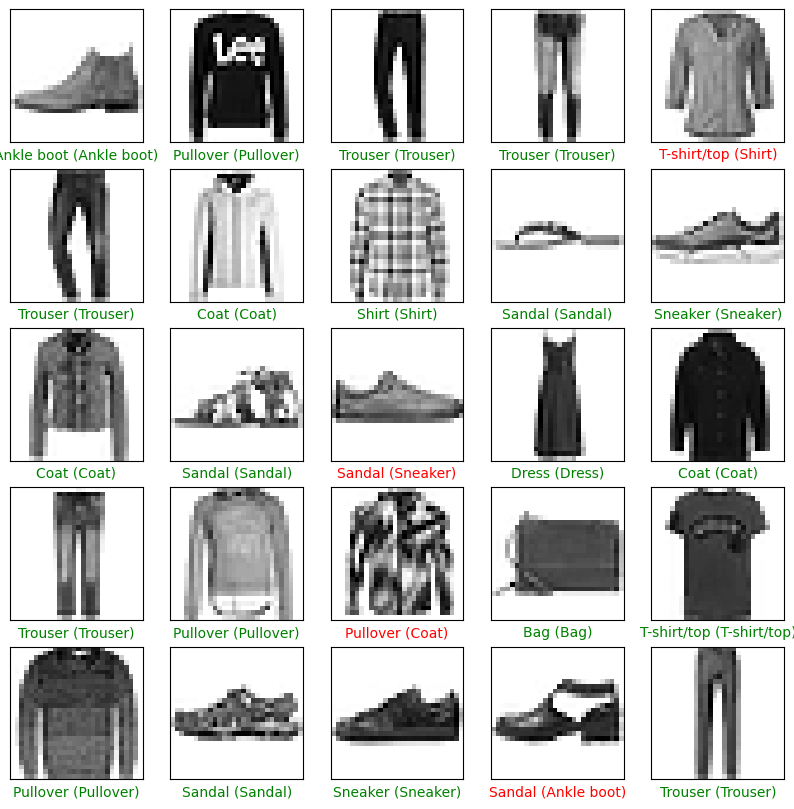

In [63]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                               class_names[true_label]),
                               color=color)